In [ ]:
#Packetes necesarios
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:


# Lista de tickers
tickers = ["AAPL", "AMZN", "AVGO", "CAT", "GOOG", "HD", "KO", "LLY", "META",
           "MSFT", "PLTR", "TRN", "TSM", "XOM", "SPY"]

# Descarga con auto_adjust=True (viene por defecto, pero lo aclaramos igual)
data = yf.download(tickers,
                   start="2020-01-01",
                   end="2023-12-31",
                   interval="1mo",
                   auto_adjust=True)

# Solo tomamos la columna 'Close'
data = data['Close']

# Eliminamos filas con datos faltantes
data.dropna(inplace=True)

# Calculamos retornos mensuales (pueden ser logarítmicos o simples)
returns = data.pct_change().dropna()

# Guardamos en CSV por si lo necesitas fuera de Python
returns.to_csv("retornos_mensuales.csv")

# Mostrar una muestra
returns.head()


[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AMZN,AVGO,CAT,GOOG,HD,KO,LLY,META,MSFT,PLTR,SPY,TRN,TSM,XOM
Date,,,,,,,,,,,,,,,
2020-10-01,-0.060012,-0.035754,-0.031572,0.052967,0.103028,-0.034545,-0.018654,-0.118633,0.004620,-0.037370,0.066316,-0.021030,-0.033846,0.039879,-0.049811
2020-11-01,0.093607,0.043440,0.148585,0.112068,0.086199,0.040118,0.073658,0.116434,0.052678,0.057292,1.676209,0.108777,0.224180,0.156790,0.168915
2020-12-01,0.116497,0.028058,0.090318,0.048563,-0.005032,-0.042500,0.071124,0.165174,-0.013756,0.041726,-0.131317,0.032647,0.154923,0.123892,0.107120
2021-01-01,-0.005501,-0.015576,0.037658,0.004505,0.047868,0.025136,-0.121991,0.231758,-0.054291,0.042892,0.493843,-0.005971,0.053808,0.119155,0.087821
2021-02-01,-0.081085,-0.035328,0.042997,0.186986,0.109558,-0.046082,0.017445,-0.014810,-0.002749,0.001810,-0.320637,0.027806,0.163002,0.036373,0.212533


In [ ]:
from datetime import datetime, timedelta

# Lista de tickers
tickers = ["AAPL", "AMZN", "AVGO", "CAT", "GOOG", "HD", "KO", "LLY", "META",
           "MSFT", "PLTR", "TRN", "TSM", "XOM", "SPY"]

# Fechas: últimos 5 años desde hoy
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Descarga de datos con precios ajustados
data = yf.download(tickers,
                   start=start_date.strftime('%Y-%m-%d'),
                   end=end_date.strftime('%Y-%m-%d'),
                   interval='1mo',
                   auto_adjust=True)

# Usamos solo los precios de cierre
data = data['Close']

# Eliminamos fechas con valores faltantes
data.dropna(inplace=True)

# Calculamos retornos mensuales simples
returns = data.pct_change().dropna()

# Guardamos por si deseas exportarlo
returns.to_csv("retornos_mensuales_5años.csv")

# Mostrar ejemplo
returns.head()


[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AMZN,AVGO,CAT,GOOG,HD,KO,LLY,META,MSFT,PLTR,SPY,TRN,TSM,XOM
Date,,,,,,,,,,,,,,,
2020-10-01,-0.060012,-0.035754,-0.031572,0.052967,0.103028,-0.034545,-0.018654,-0.118633,0.004620,-0.037370,0.066316,-0.021030,-0.033846,0.039879,-0.049811
2020-11-01,0.093606,0.043440,0.148586,0.112068,0.086199,0.040118,0.073658,0.116434,0.052678,0.057292,1.676209,0.108777,0.224180,0.156790,0.168915
2020-12-01,0.116496,0.028058,0.090318,0.048563,-0.005032,-0.042500,0.071124,0.165174,-0.013756,0.041726,-0.131317,0.032647,0.154923,0.123892,0.107120
2021-01-01,-0.005502,-0.015576,0.037658,0.004505,0.047869,0.025136,-0.121991,0.231758,-0.054291,0.042892,0.493843,-0.005971,0.053808,0.119156,0.087821
2021-02-01,-0.081085,-0.035328,0.042996,0.186987,0.109558,-0.046082,0.017445,-0.014810,-0.002748,0.001811,-0.320637,0.027806,0.163002,0.036373,0.212533


In [ ]:
from google.colab import files
files.download("retornos_mensuales_5años.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Estadísticos descriptivos básicos
stats = returns.describe().T[['mean', 'std', 'min', 'max']]
stats.rename(columns={'mean': 'Retorno promedio', 'std': 'Volatilidad'}, inplace=True)
stats


,Retorno promedio,Volatilidad,min,max
Ticker,,,,
AAPL,0.012802,0.072635,-0.120817,0.188633
AMZN,0.008698,0.089749,-0.237525,0.270596
AVGO,0.041703,0.108374,-0.162584,0.430405
CAT,0.020802,0.095535,-0.171978,0.319235
GOOG,0.017960,0.077943,-0.176750,0.165080
HD,0.009298,0.069198,-0.139381,0.181582
KO,0.010479,0.051135,-0.121991,0.137639
LLY,0.034100,0.094856,-0.179409,0.231758
META,0.023967,0.118848,-0.326342,0.267711


In [ ]:
# Correlación
correlation_matrix = returns.corr()

# Covarianza
covariance_matrix = returns.cov()


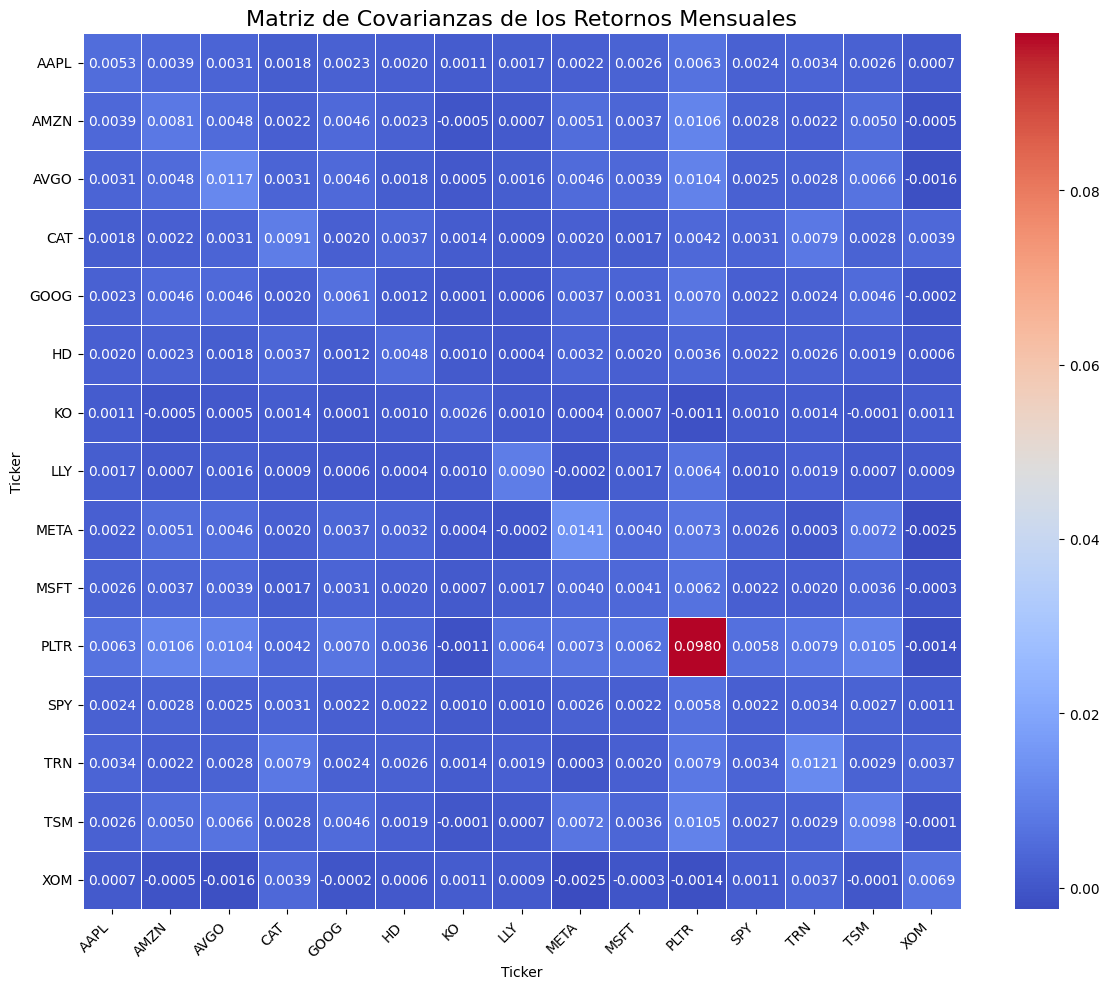

In [ ]:
# Crear el gráfico de calor
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, annot=True, fmt=".4f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Covarianzas de los Retornos Mensuales", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


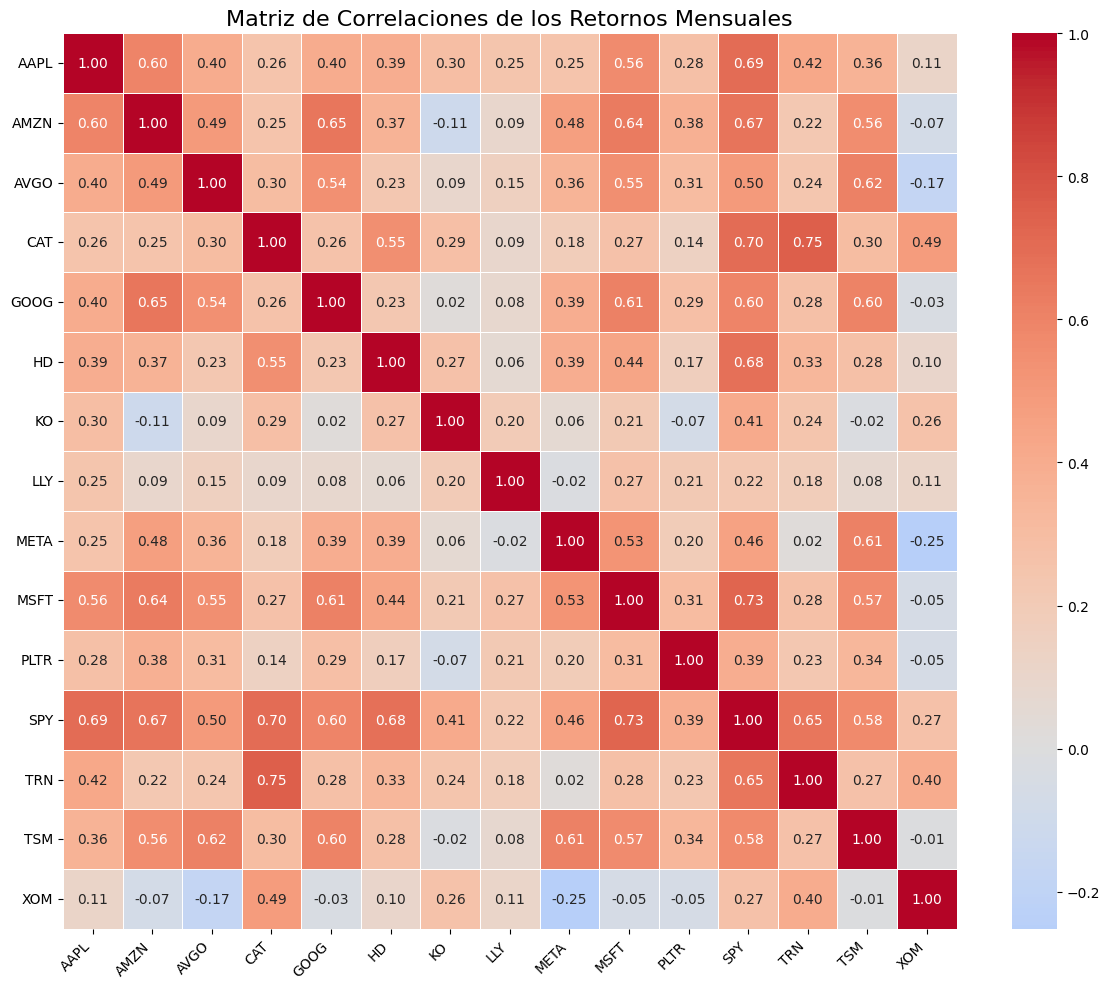

In [ ]:

# Cargar los datos (reemplaza si ya tienes el DataFrame `returns`)
returns = pd.read_csv("retornos_mensuales_5años.csv", index_col=0, parse_dates=True)

# Calcular matriz de correlación
correlation_matrix = returns.corr()

# Crear el gráfico de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, center=0)
plt.title("Matriz de Correlaciones de los Retornos Mensuales", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Ratio de Sharpe Anualizado para cada activo:
      Sharpe Ratio
AVGO          1.28
LLY           1.18
XOM           1.03
PLTR          0.87
MSFT          0.80
SPY           0.79
GOOG          0.72
TSM           0.70
CAT           0.69
META          0.65
KO            0.60
AAPL          0.53
HD            0.38
TRN           0.37
AMZN          0.27


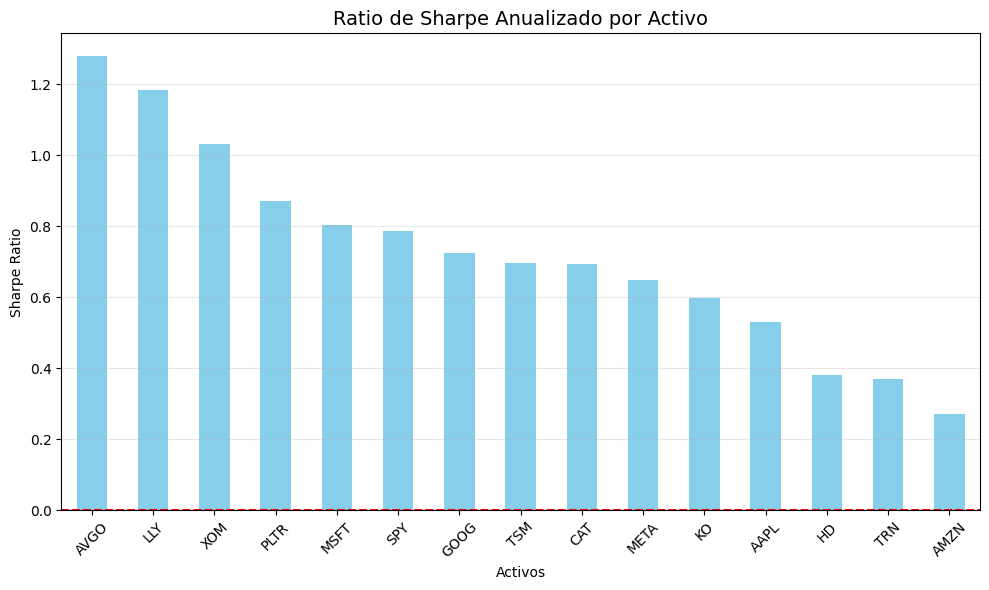

In [ ]:

# 1. Configuración inicial
tasa_libre_riesgo_anual = 0.02  # 2% anual (ajustable)
meses_por_año = 12

# 2. Cargar tus estadísticas (o usar las que ya calculaste)
# Asumiendo que tienes un DataFrame stats con las medias y desviaciones estándar
# Ejemplo:
stats = pd.DataFrame({
    'Retorno promedio': [0.012802, 0.008698, 0.041703, 0.020802, 0.017960,
                         0.009298, 0.010479, 0.034100, 0.023967, 0.016599,
                         0.080319, 0.012365, 0.013423, 0.021614, 0.026405],
    'Volatilidad': [0.072635, 0.089749, 0.108374, 0.095535, 0.077943,
                    0.069198, 0.051135, 0.094856, 0.118848, 0.064332,
                    0.313034, 0.047033, 0.110073, 0.099229, 0.083011]
}, index=['AAPL', 'AMZN', 'AVGO', 'CAT', 'GOOG', 'HD', 'KO', 'LLY', 'META',
          'MSFT', 'PLTR', 'SPY', 'TRN', 'TSM', 'XOM'])

# 3. Función para calcular Sharpe Ratio anualizado
def calcular_sharpe(retorno_mensual, volatilidad_mensual, tasa_libre_riesgo_anual):
    """
    Calcula el Sharpe Ratio anualizado

    Args:
        retorno_mensual: Retorno promedio mensual (decimal)
        volatilidad_mensual: Volatilidad mensual (decimal)
        tasa_libre_riesgo_anual: Tasa anual (decimal)

    Returns:
        float: Sharpe Ratio anualizado
    """
    # Convertir tasa libre de riesgo a mensual
    rf_mensual = tasa_libre_riesgo_anual / meses_por_año

    # Calcular Sharpe mensual
    sharpe_mensual = (retorno_mensual - rf_mensual) / volatilidad_mensual

    # Anualizar
    sharpe_anualizado = sharpe_mensual * np.sqrt(meses_por_año)

    return sharpe_anualizado

# 4. Calcular para todos los activos
stats['Sharpe Ratio'] = stats.apply(
    lambda x: calcular_sharpe(x['Retorno promedio'], x['Volatilidad'], tasa_libre_riesgo_anual),
    axis=1
)

# 5. Ordenar por mejor Sharpe Ratio
stats_sorted = stats.sort_values(by='Sharpe Ratio', ascending=False)

# 6. Mostrar resultados
print("Ratio de Sharpe Anualizado para cada activo:")
print(stats_sorted[['Sharpe Ratio']].round(2))

# 7. Visualización opcional
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats_sorted['Sharpe Ratio'].plot(kind='bar', color='skyblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ratio de Sharpe Anualizado por Activo', fontsize=14)
plt.ylabel('Sharpe Ratio')
plt.xlabel('Activos')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:

mean_returns = stats['Retorno promedio'].values
cov_matrix = returns.cov().values
tickers = stats.index.tolist()

# Parámetros
num_portafolios = 80000
tasa_libre_riesgo = 0.02  # 2% anual

# Inicializar arrays para resultados
resultados = np.zeros((num_portafolios, 3 + len(tickers)))

for i in range(num_portafolios):
    # Generar pesos aleatorios que sumen 1
    pesos = np.random.random(len(tickers))
    pesos /= np.sum(pesos)

    # Retorno esperado del portafolio
    retorno_esperado = np.dot(pesos, mean_returns) * 12  # anualizado

    # Riesgo (volatilidad)
    volatilidad = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix * 12, pesos)))  # anualizado

    # Sharpe Ratio
    sharpe = (retorno_esperado - tasa_libre_riesgo) / volatilidad

    # Guardar: retorno, riesgo, sharpe, y pesos
    resultados[i, 0] = retorno_esperado
    resultados[i, 1] = volatilidad
    resultados[i, 2] = sharpe
    resultados[i, 3:] = pesos

# Convertimos a DataFrame
columnas = ['Retorno', 'Volatilidad', 'Sharpe Ratio'] + tickers
portafolios = pd.DataFrame(resultados, columns=columnas)

# Buscar portafolios óptimos
mejor_sharpe = portafolios.loc[portafolios['Sharpe Ratio'].idxmax()]
menor_riesgo = portafolios.loc[portafolios['Volatilidad'].idxmin()]
mayor_retorno = portafolios.loc[portafolios['Retorno'].idxmax()]


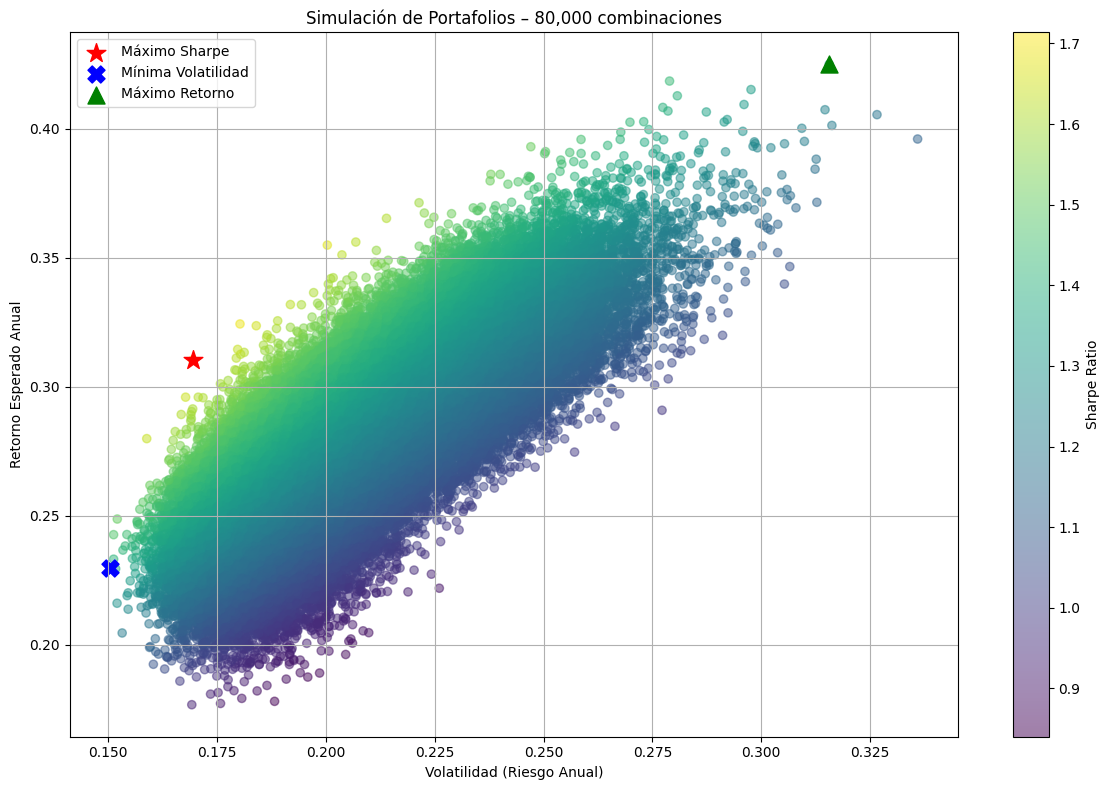

In [ ]:
plt.figure(figsize=(12, 8))
sc = plt.scatter(portafolios['Volatilidad'], portafolios['Retorno'],
                 c=portafolios['Sharpe Ratio'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Sharpe Ratio')

# Marcadores especiales
plt.scatter(mejor_sharpe['Volatilidad'], mejor_sharpe['Retorno'], color='red', marker='*', s=200, label='Máximo Sharpe')
plt.scatter(menor_riesgo['Volatilidad'], menor_riesgo['Retorno'], color='blue', marker='X', s=150, label='Mínima Volatilidad')
plt.scatter(mayor_retorno['Volatilidad'], mayor_retorno['Retorno'], color='green', marker='^', s=150, label='Máximo Retorno')

plt.title('Simulación de Portafolios – 80,000 combinaciones')
plt.xlabel('Volatilidad (Riesgo Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


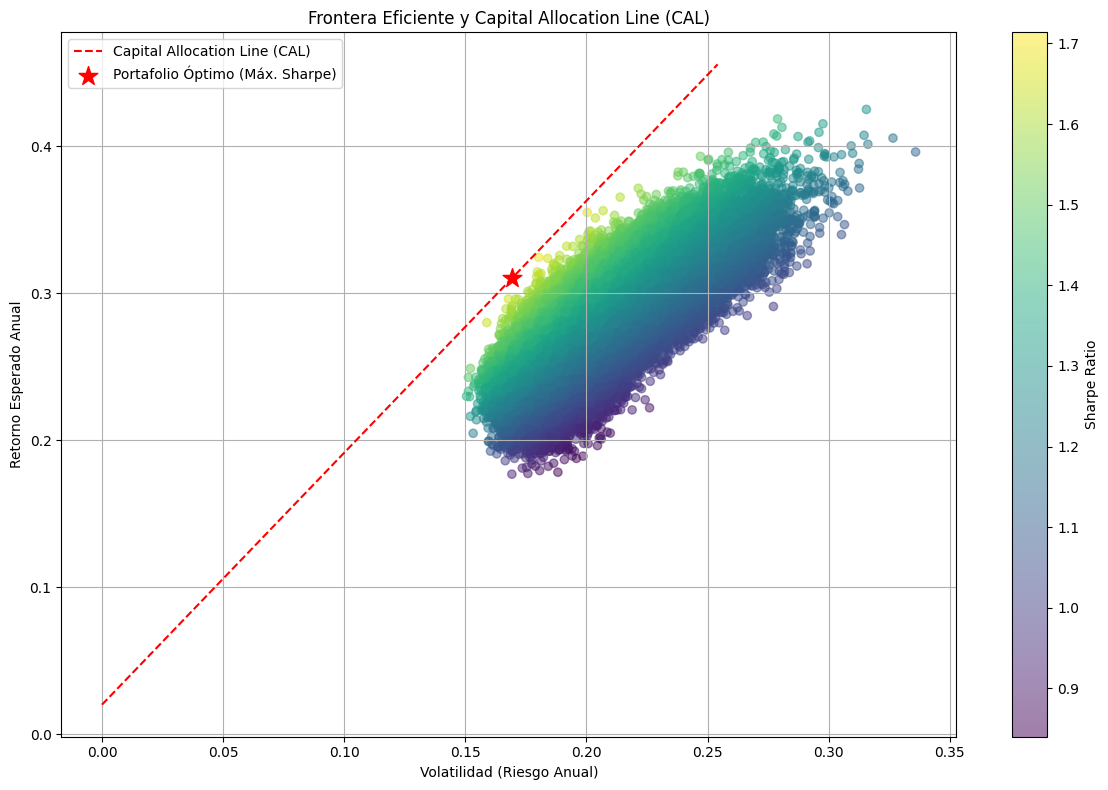

In [ ]:
# Requiere que ya se haya definido:
# - mejor_sharpe
# - tasa_libre_riesgo

# Extraer retorno y riesgo del portafolio óptimo
rp = mejor_sharpe['Retorno']
sp = mejor_sharpe['Volatilidad']

# Pendiente de la CAL (Sharpe Ratio)
slope = (rp - tasa_libre_riesgo) / sp

# Crear volatilidades para la línea CAL (hasta un poco más que la frontera)
x_cal = np.linspace(0, sp * 1.5, 100)
y_cal = tasa_libre_riesgo + slope * x_cal

# Graficar
plt.figure(figsize=(12, 8))
sc = plt.scatter(portafolios['Volatilidad'], portafolios['Retorno'],
                 c=portafolios['Sharpe Ratio'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Sharpe Ratio')

# CAL
plt.plot(x_cal, y_cal, color='red', linestyle='--', label='Capital Allocation Line (CAL)')

# Punto de tangencia (portafolio óptimo)
plt.scatter(sp, rp, color='red', marker='*', s=200, label='Portafolio Óptimo (Máx. Sharpe)')

# Rótulos
plt.title('Frontera Eficiente y Capital Allocation Line (CAL)')
plt.xlabel('Volatilidad (Riesgo Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


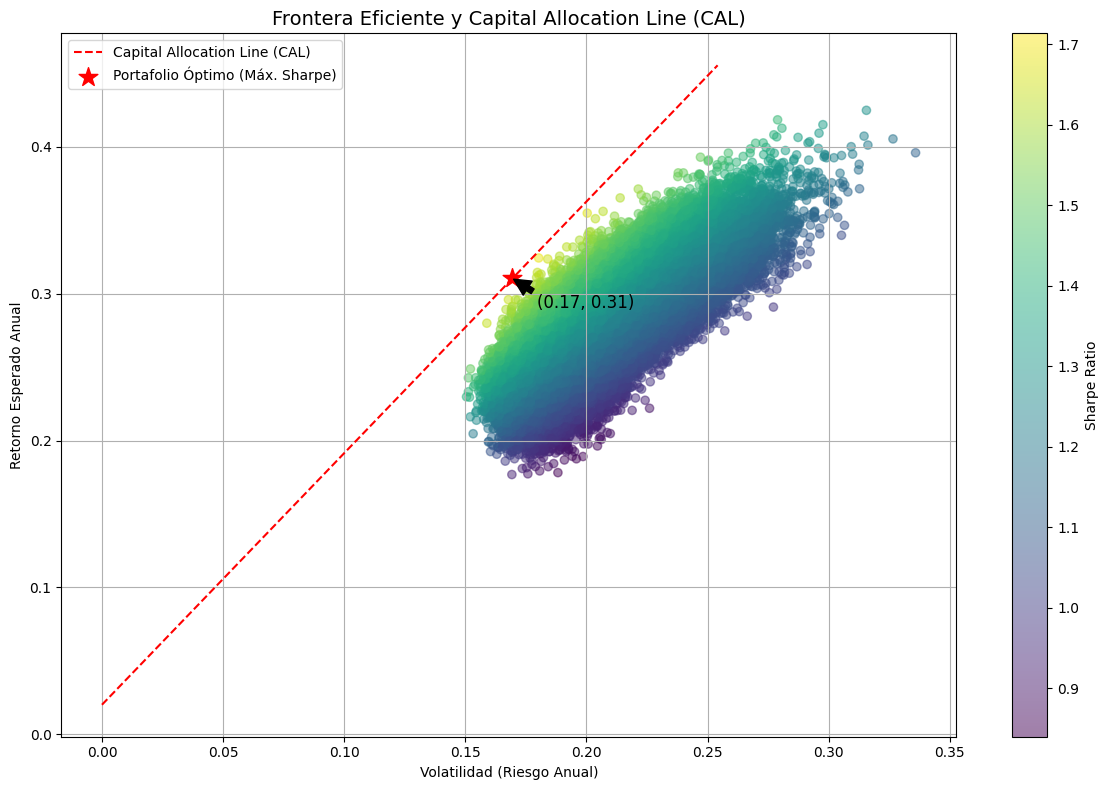

In [ ]:
# Ya tienes estas dos variables:
rp = mejor_sharpe['Retorno']       # retorno anual del portafolio óptimo
sp = mejor_sharpe['Volatilidad']   # volatilidad anual del portafolio óptimo

plt.figure(figsize=(12, 8))
sc = plt.scatter(portafolios['Volatilidad'], portafolios['Retorno'],
                 c=portafolios['Sharpe Ratio'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Sharpe Ratio')

# CAL
plt.plot(x_cal, y_cal, color='red', linestyle='--', label='Capital Allocation Line (CAL)')

# Punto del portafolio óptimo
plt.scatter(sp, rp, color='red', marker='*', s=200, label='Portafolio Óptimo (Máx. Sharpe)')

# Anotar valores del punto óptimo
plt.annotate(f'({sp:.2f}, {rp:.2f})',
             xy=(sp, rp),
             xytext=(sp + 0.01, rp - 0.02),
             fontsize=12,
             color='black',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Gráfico final
plt.title('Frontera Eficiente y Capital Allocation Line (CAL)', fontsize=14)
plt.xlabel('Volatilidad (Riesgo Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
mejor_sharpe = portafolios.loc[portafolios['Sharpe Ratio'].idxmax()]


In [ ]:
# Extraer los nombres de los activos (columnas después de 'Sharpe Ratio')
tickers = stats.index.tolist()

# Extraer los pesos del portafolio óptimo
pesos_optimos = mejor_sharpe[tickers]

# Convertir a porcentaje
pesos_en_porcentaje = pesos_optimos * 100

# Redondear para presentación
pesos_redondeados = pesos_en_porcentaje.round(2)

# Mostrar como tabla
print("Ponderación del portafolio óptimo (%):")
print(pesos_redondeados)


Ponderación del portafolio óptimo (%):
AAPL    10.13
AMZN     1.14
AVGO    14.57
CAT      3.30
GOOG     5.43
HD       0.89
KO      12.43
LLY      8.90
META    13.31
MSFT     0.45
PLTR     3.19
SPY      0.65
TRN      1.70
TSM      2.92
XOM     21.00
Name: 7932, dtype: float64
